In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Решающее дерево

![](https://habrastorage.org/files/c96/80a/a4b/c9680aa4babc40f4bbc8b3595e203979.png)

In [2]:
import math

def entropy(arr):
    probs = [arr.count(i)/len(arr) for i in list(set(arr))]
    return sum([-math.log(i, 2)*i for i in probs])

In [3]:
a = [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]

entropy(a)

0.9927744539878084

In [ ]:
entropy(a[13:])

0.5916727785823275

In [4]:
entropy(a[:13])

0.961236604722876

![](https://habrastorage.org/files/186/444/a8b/186444a8bd0e451c8324ca8529f8d4f4.png)

In [5]:

a = [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
entr = entropy(a)
# print(entr)

# arr1= a[:13]
# arr2 =a[13:]


# print(entropy(arr1), entropy(arr2))
igs = []
appending = []
for i in range(1, len(a)):
    arr1 = a[:i]
    arr2 = a[i:]    
    print('split by x<=', i)
    appending.append('split by x<='+ str(i))
    print('entropies:', entropy(arr1), entropy(arr2))
    print('ig =', entr - (len(arr1)/len(a))*entropy(arr1) - (len(arr2)/len(a))*entropy(arr2))
    igs.append(entr - (len(arr1)/len(a))*entropy(arr1) - (len(arr2)/len(a))*entropy(arr2))
    print('---------------------')

split by x<= 1
entropies: 0.0 0.9980008838722996
ig = 0.044673614309123866
---------------------
split by x<= 2
entropies: 1.0 0.9910760598382222
ig = 0.0008060001334083688
---------------------
split by x<= 3
entropies: 0.9182958340544896 0.9774178175281716
ig = 0.024224933980689145
---------------------
split by x<= 4
entropies: 0.8112781244591328 0.9544340029249649
ig = 0.06697162675600987
---------------------
split by x<= 5
entropies: 0.7219280948873623 0.9182958340544896
ig = 0.12357055472510059
---------------------
split by x<= 6
entropies: 0.9182958340544896 0.9402859586706309
ig = 0.05908553270201988
---------------------
split by x<= 7
entropies: 0.9852281360342516 0.961236604722876
ig = 0.023140813305950858
---------------------
split by x<= 8
entropies: 1.0 0.9798687566511527
ig = 0.004853199997116753
---------------------
split by x<= 9
entropies: 0.9910760598382222 0.9940302114769565
ig = 7.361074828227121e-05
---------------------
split by x<= 10
entropies: 1.0 0.970950

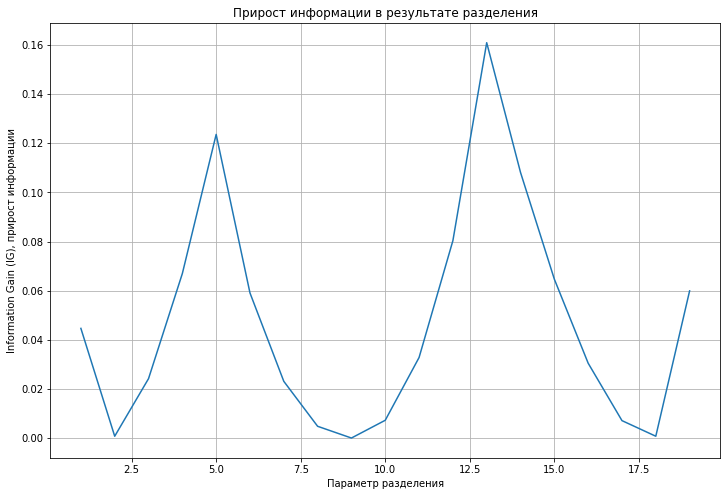

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot([i for i in range(1, 20)], igs)
ax.set_title('Прирост информации в результате разделения')
ax.set_ylabel('Information Gain (IG), прирост информации')
ax.set_xlabel(r'Параметр разделения')
ax.grid(True)
plt.show()

![](https://habrastorage.org/storage2/785/21c/7c6/78521c7c61114d0c433d76cb4f282f15.png)

In [8]:
appending[igs.index(max(igs))]

'split by x<=13'

In [7]:
max(igs)

0.16088518841412436

In [ ]:
def tree_split(arr):
    entr = entropy(arr)

    igs = []
    appending = []
    for i in range(1, len(arr)):
        arr1 = arr[:i]
        arr2 = arr[i:]    
#         print('split by x<=', i)
        appending.append(['split by x<='+ str(i), i])
#         print('entropies:', entropy(arr1), entropy(arr2))
#         print('ig =', entr - (len(arr1)/len(a))*entropy(arr1) - (len(arr2)/len(a))*entropy(arr2))
        igs.append(entr - (len(arr1)/len(a))*entropy(arr1) - (len(arr2)/len(a))*entropy(arr2))
#         print('---------------------')
    if appending == []:
        return None
    return appending[igs.index(max(igs))][1]

![](https://habrastorage.org/storage2/173/96f/27f/17396f27f81e9bb312f2f01aa1254dbe.png)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

![](https://habrastorage.org/files/856/c8b/9ad/856c8b9ad9094250a9d23e91e6f74e97.png)

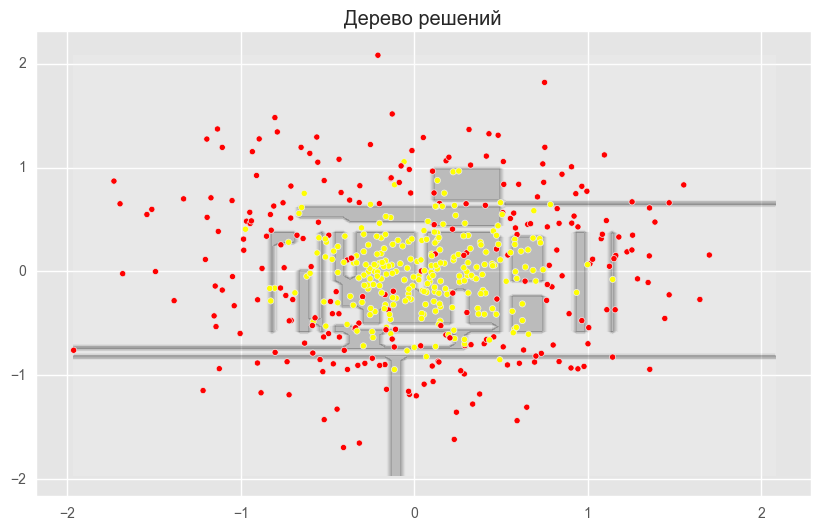

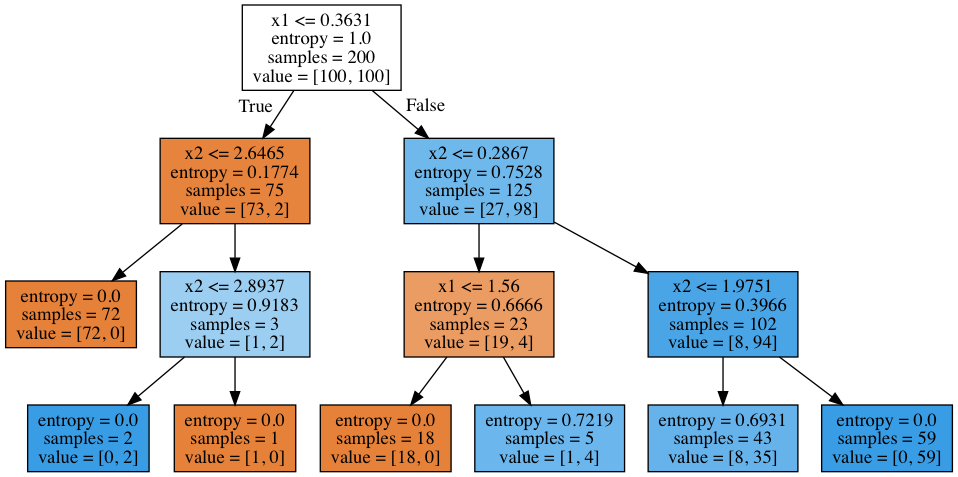

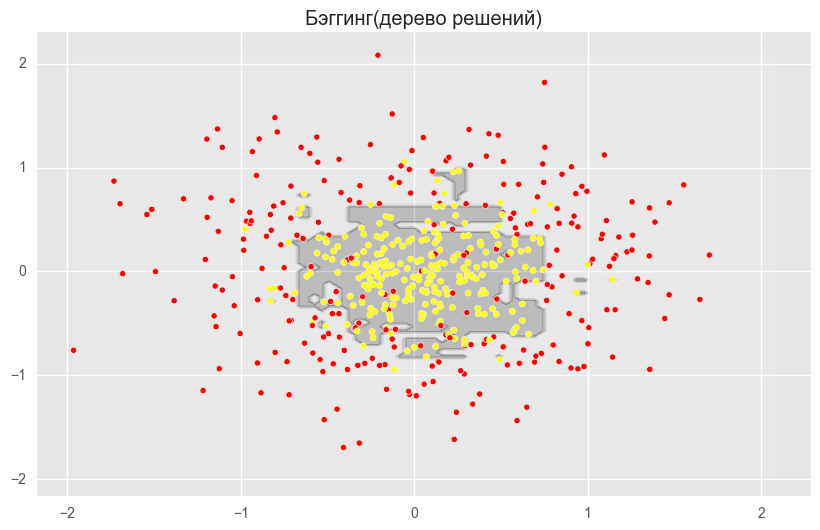

In [9]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [12]:
y = data.target
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(df.values, y, test_size=0.15)

In [18]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

In [19]:
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# перебираем глубину
# перебираем мин кол-во для разделения
# максимально кол-во признаков для более случайной выборки
param_grid = {'max_depth': [i for i in range(2, 15)],
              'min_samples_split': [i for i in range(2, 10)],
              'max_features': [2, len(X_train[0])-1]
              }

# инициализируем случайный лес с перебором по кросс-вал на выбранных выше праметрах
gs = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
print()
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 208 candidates, totalling 1040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  3.3min


[Parallel(n_jobs=-1)]: Done 1040 out of 1040 | elapsed:  3.5min finished


({'max_depth': 12, 'max_features': 2, 'min_samples_split': 4},
 0.9710051546391751)

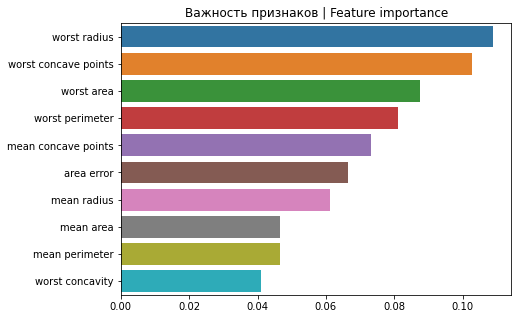

In [25]:
def plot_feature_importances(model, columns):
    # выбираем кол-во признаков для отображения
    nr_f = 10
    # берем данные для графика
    # берем алгоритм с лучшими параметрами
    # по х мы берем важность признаков исходя из критерия Джини, сортируем их вместе с названиями колонок по возрастанию
    imp = pd.Series(data = model.best_estimator_.feature_importances_, 
                    index=columns).sort_values(ascending=False)
    # построили фигуру
    plt.figure(figsize=(7,5))
    # отобразили название
    plt.title("Важность признаков | Feature importance")
    # построили 10 самых важных признаков
    ax = sns.barplot(y=imp.index[:nr_f], x=imp.values[:nr_f], orient='h')


# вызвали функцию отображения самых важных признаков
# тут dummies_columns - название всех колонок, типа encoded_df.columns
plot_feature_importances(gs, df.columns)

In [27]:
from sklearn.metrics import classification_report

preds = gs.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.90      0.98      0.94        53

    accuracy                           0.92        86
   macro avg       0.93      0.90      0.91        86
weighted avg       0.92      0.92      0.92        86

